# Reinforcement Learning - Deep Q Network

In [1]:
import random
import torch
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys

assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

In [3]:
import gym
env = gym.envs.make("CartPole-v1")

In [4]:
from project.networks import SARSANetwork, DeepQNetwork
from project.train_network import run_episodes
from project.policies import EpsilonGreedyPolicy

In [5]:
def set_seeds(seed):
    random.seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
    env.seed(seed)

In [6]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def plot_graph(durations, losses):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(smooth(episode_durations, 10))
    axes[0].set_title('Episode durations per episode')
    axes[1].plot(smooth(losses, 10))
    axes[1].set_title('Gradient loss per episode')
    fig.tight_layout()
    plt.show()

## 1. Deep Q-Network (DQN)

 Episode 0 finished after 29 steps
 Episode 10 finished after 15 steps
 Episode 20 finished after 35 steps
 Episode 30 finished after 229 steps
 Episode 40 finished after 203 steps
 Episode 50 finished after 173 steps
 Episode 60 finished after 59 steps
 Episode 70 finished after 296 steps
 Episode 80 finished after 145 steps
 Episode 90 finished after 189 steps


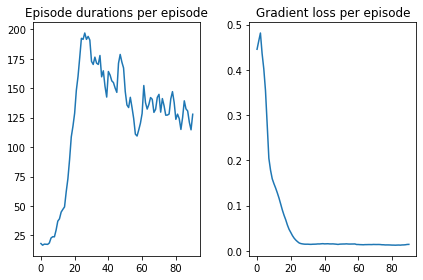

In [7]:
num_episodes = 100
batch_size = 64
discount_factor = 0.8
learn_rate = 1e-2
num_hidden = 128
seed = 42  # This is not randomly chosen

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

network = DeepQNetwork(in_features=4, num_hidden=num_hidden, out_features=2, discount_factor=discount_factor)
episode_durations, losses = run_episodes(env, EpsilonGreedyPolicy, network, num_episodes, batch_size, learn_rate, semi_grad=True, use_replay=True)

plot_graph(episode_durations, losses)

## 2. Deep SARSA-Network (DQN)

 Episode 0 finished after 30 steps
 Episode 10 finished after 16 steps
 Episode 20 finished after 150 steps
 Episode 30 finished after 220 steps
 Episode 40 finished after 237 steps
 Episode 50 finished after 200 steps
 Episode 60 finished after 207 steps
 Episode 70 finished after 143 steps
 Episode 80 finished after 232 steps
 Episode 90 finished after 169 steps


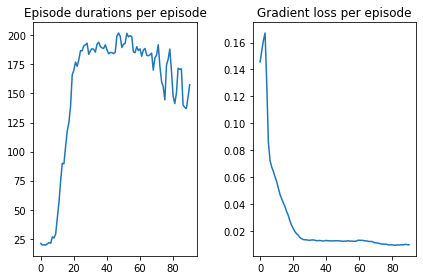

In [8]:
num_episodes = 100
batch_size = 64
discount_factor = 0.8
learn_rate = 1e-2
num_hidden = 128
seed = 42  # This is not randomly chosen

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

network = SARSANetwork(in_features=4, num_hidden=num_hidden, out_features=2, discount_factor=discount_factor)
episode_durations, losses = run_episodes(env, EpsilonGreedyPolicy, network, num_episodes, batch_size, learn_rate, semi_grad=True, use_replay=True)

plot_graph(episode_durations, losses)